In [65]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline

In [66]:
endpoint = 'https://data.nashville.gov/resource/fuaa-r5cm.json'

In [67]:
response = requests.get(endpoint)

In [68]:
response

<Response [200]>

In [69]:
result = response.json()

In [70]:
search_dict = {}
for line in result:
    count = int(line.get('query_count'))
    text = line.get('query_text')
    if text in search_dict:
        search_dict[text] += count
    else:
        search_dict[text] = count

In [71]:
search_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
search_df = search_df.reset_index()
search_df.columns = ['term', 'text']
search_df.head()

,term,text
0,ebid,521
1,property maps,252
2,maps,237
3,property tax,214
4,jobs,210


In [72]:
search_df = search_df.sort_values('text', ascending=False)
search_df.head(10)

,term,text
0,ebid,521
1,property maps,252
2,maps,237
10,property taxes,235
3,property tax,214
4,jobs,210
5,employment,189
7,police,167
8,criminal court clerk,167
9,media releases,165


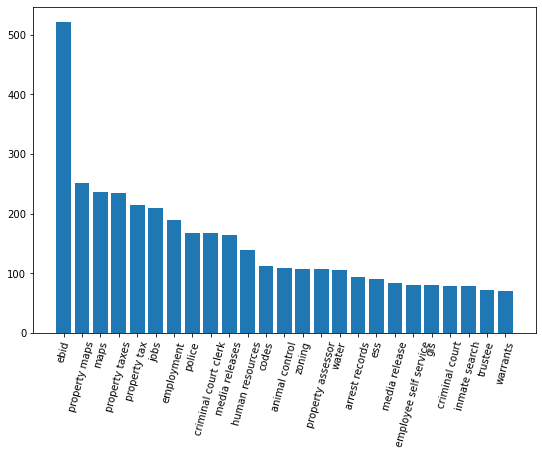

In [73]:
plt.figure(figsize=(9,6))
plt.bar('term', 'text', data = search_df.head(25))
plt.xticks(rotation = 75);

Make an API request that returns the months where "fire" was searched in 2016. Which month had the most searches?

In [74]:
args = '?year=2016&query_text=fire'

In [75]:
search = endpoint + args

In [76]:
search

'https://data.nashville.gov/resource/fuaa-r5cm.json?year=2016&query_text=fire'

In [77]:
response = requests.get(search)

In [78]:
results = response.json()

In [79]:
results

[{'month_name': 'January',
  'year': '2016',
  'query_count': '19',
  'query_text': 'fire'},
 {'month_name': 'February',
  'year': '2016',
  'query_count': '35',
  'query_text': 'fire'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '32',
  'query_text': 'fire'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '26',
  'query_text': 'fire'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'June',
  'year': '2016',
  'query_count': '31',
  'query_text': 'fire'},
 {'month_name': 'July',
  'year': '2016',
  'query_count': '24',
  'query_text': 'fire'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '47',
  'query_text': 'fire'},
 {'month_name': 'September',
  'year': '2016',
  'query_count': '36',
  'query_text': 'fire'},
 {'month_name': 'October',
  'year': '2016',
  'query_count': '38',
  'query_text': 'fire'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '32',
  'query_text

In [80]:
fire_2016 = pd.DataFrame.from_dict(results)

In [81]:
fire_2016.sort_values(by='query_count', ascending=False).head()

,month_name,year,query_count,query_text
7,August,2016,47,fire
9,October,2016,38,fire
11,December,2016,38,fire
8,September,2016,36,fire
1,February,2016,35,fire


Make an API request that returns all the times a query was run more than 100 times in a month. How many times did this occur?

In [82]:
args = '?$where=query_count>100.0'

In [83]:
search = endpoint + args

In [84]:
search

'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100.0'

In [85]:
response = requests.get(search)

In [86]:
response

<Response [200]>

In [87]:
results = response.json()

In [88]:
results

[{'month_name': 'March',
  'year': '2014',
  'query_count': '101',
  'query_text': 'permits'},
 {'month_name': 'January',
  'year': '2015',
  'query_count': '101',
  'query_text': 'criminal court clerk'},
 {'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'police'},
 {'month_name': 'March',
  'year': '2016',
  'query_count': '101',
  'query_text': 'civil service'},
 {'month_name': 'November',
  'year': '2016',
  'query_count': '101',
  'query_text': 'jobs'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'metro holidays'},
 {'month_name': 'November',
  'year': '2017',
  'query_count': '101',
  'query_text': 'longevity pay'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
  'query_text': 'West Nashville Heights Church of Christ'},
 {'month_name': 'January',
  'year': '2018',
  'query_count': '101',
 

Make another API request that returns all the times "codes" was searched more than 100 times in a month. How many times did this occur?

In [89]:
args = '?$where=query_count>100&query_text=codes'

In [90]:
search = endpoint + args

In [91]:
search

'https://data.nashville.gov/resource/fuaa-r5cm.json?$where=query_count>100&query_text=codes'

In [92]:
response = requests.get(search)

In [93]:
response

<Response [200]>

In [94]:
results = response.json()

In [95]:
results

[{'month_name': 'September',
  'year': '2015',
  'query_count': '101',
  'query_text': 'codes'},
 {'month_name': 'April',
  'month': '4',
  'year': '2021',
  'query_count': '102',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2016',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'November',
  'month': '11',
  'year': '2020',
  'query_count': '104',
  'query_text': 'codes'},
 {'month_name': 'December',
  'year': '2017',
  'query_count': '106',
  'query_text': 'codes'},
 {'month_name': 'May',
  'year': '2016',
  'query_count': '107',
  'query_text': 'codes'},
 {'month_name': 'April',
  'year': '2016',
  'query_count': '111',
  'query_text': 'codes'},
 {'month_name': 'January',
  'year': '2017',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'May',
  'month': '5',
  'year': '2021',
  'query_count': '115',
  'query_text': 'codes'},
 {'month_name': 'August',
  'year': '2015',
  'query_count': '117',
  'query_text': 'codes'},
 {'month_na

Make an API request that returns the entire Top 500 Monthly Searches dataset.

In [96]:
args = '?$order=query_count DESC &$where=query_count>0'

In [97]:
search = endpoint + args

In [98]:
search

'https://data.nashville.gov/resource/fuaa-r5cm.json?$order=query_count DESC &$where=query_count>0'

In [99]:
response = requests.get(search)

In [100]:
response

<Response [200]>

In [101]:
results = response.json()

In [102]:
results

[{'month_name': 'September',
  'month': '9',
  'year': '2019',
  'query_count': '5610',
  'query_text': 'test'},
 {'month_name': 'September',
  'month': '9',
  'year': '2019',
  'query_count': '5327',
  'query_text': 'directory'},
 {'month_name': 'January',
  'month': '1',
  'year': '2019',
  'query_count': '2646',
  'query_text': 'Nashville'},
 {'month_name': 'October',
  'year': '2018',
  'query_count': '816',
  'query_text': 'annual enrollment'},
 {'month_name': 'September',
  'year': '2018',
  'query_count': '750',
  'query_text': 'annual enrollment'},
 {'month_name': 'September',
  'year': '2017',
  'query_count': '704',
  'query_text': 'annual enrollment'},
 {'month_name': 'October',
  'month': '10',
  'year': '2019',
  'query_count': '692',
  'query_text': 'directory'},
 {'month_name': 'October',
  'year': '2017',
  'query_count': '648',
  'query_text': 'annual enrollment'},
 {'month_name': 'January',
  'month': '1',
  'year': '2020',
  'query_count': '577',
  'query_text': 'nas

In [103]:
top_500 = pd.DataFrame.from_dict(results)

In [104]:
top_500

,month_name,month,year,query_count,query_text
0,September,9,2019,5610,test
1,September,9,2019,5327,directory
2,January,1,2019,2646,Nashville
3,October,NaN,2018,816,annual enrollment
4,September,NaN,2018,750,annual enrollment
...,...,...,...,...,...
995,May,5,2021,111,zoning
996,November,11,2020,111,Jobs
997,August,8,2020,111,ESS
998,January,1,2020,111,finance


Make a chart that shows the number of times "maps" was searched in a month across the entire time frame.

In [105]:
args = '?$q=maps&$where=query_count>0'

In [106]:
search = endpoint + args

In [107]:
response = requests.get(search)

In [108]:
results = response.json()

In [109]:
response

<Response [200]>

In [110]:
maps = pd.DataFrame.from_dict(results)
maps

,month_name,year,query_count,query_text,month
0,January,2014,112,property maps,NaN
1,January,2014,97,maps,NaN
2,January,2014,14,zoning map,NaN
3,January,2014,13,metro maps,NaN
4,January,2014,12,Maps,NaN
...,...,...,...,...,...
995,March,2020,35,crime map,3
996,March,2020,32,map,3
997,March,2020,31,property map,3
998,March,2020,31,mapping,3


In [111]:
search_dict = {}
for line in results:
    count = int(line.get('query_count'))
    text = line.get('month_name')
    if text in search_dict:
        search_dict[text]+= count
    else:
        search_dict[text]=count

In [112]:
maps_df = pd.DataFrame.from_dict(search_dict, orient = 'index')
maps_df = maps_df.reset_index()
maps_df.columns = ['month', 'query_count']
maps_df

,month,query_count
0,January,2983
1,February,2307
2,March,3233
3,April,3774
4,May,3241
5,June,3219
6,July,3100
7,August,3393
8,September,3098
9,October,3027


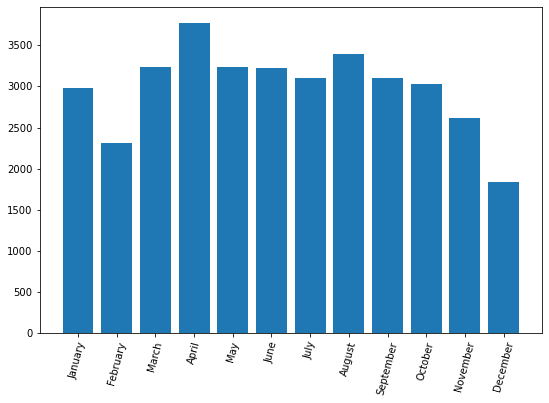

In [113]:
plt.figure(figsize =(9,6))
plt.bar('month', 'query_count', data=maps_df.head(25))
plt.xticks(rotation=75);

In [114]:
endpoint_1 = 'https://data.nashville.gov/resource/7qhx-rexh.json'

In [115]:
response = requests.get(endpoint_1)

In [116]:
results = response.json

In [117]:
response

<Response [200]>